# Econometria Aplicada

## Aula 6 - Introdução à séries temporais
---




**Motivação**:

Será que há diferença nas características do volume de vendas no comércio varejista no Brasil entre "Móveis e eletrodomésticos" e "Tecido, vestuário e calçado"?

### **Bibliotecas**

In [1]:
install.packages("rbcb")  # para obter os dados do SGS do Banco Central do Brasil

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘xts’




In [2]:
library(rbcb)

### **Dados**

In [3]:
cod <- c(  1522, # Índice volume de vendas no varejo - Móveis e eletrodomésticos - Brasil
           1509  # Índice volume de vendas no varejo - Tecido, vestuário e calçado - Brasil
            )

In [4]:
varejo  <- get_series( cod, as = "ts" )

In [5]:
dat <- data.frame( moveis = varejo$`1522`, calcado = varejo$`1509` )

Veja os primeiros 5 elementos do objeto 'dat':

In [6]:
head( dat, 5 )

,moveis,calcado
,<dbl>,<dbl>
1,30.86,61.99
2,29.71,67.81
3,31.49,71.28
4,30.13,78.23
5,36.40,96.57


Adicione ao data frame `dat` uma variável com o mês. Para isso, utilize a função `time( objeto )`, onde objeto é a série temporal cujo tempo você quer extrair. No nosso caso, será a varíavel `dat$moveis`:

In [15]:
dat$mes <- time(dat$calcado)

Veja os primeiros 5 elementos do objeto 'dat':

In [16]:
head( dat, 24 )

,moveis,calcado,mes
,<dbl>,<dbl>,<dbl>
1,30.86,61.99,2000.000
2,29.71,67.81,2000.083
3,31.49,71.28,2000.167
4,30.13,78.23,2000.250
5,36.40,96.57,2000.333
6,31.91,90.50,2000.417
7,35.15,88.39,2000.500
8,36.30,82.81,2000.583
9,33.68,75.00,2000.667


Veja a estrutura dos dados:

In [9]:
str(dat)

'data.frame':	279 obs. of  3 variables:
 $ moveis : Time-Series  from 2000 to 2023: 30.9 29.7 31.5 30.1 36.4 ...
 $ calcado: Time-Series  from 2000 to 2023: 62 67.8 71.3 78.2 96.6 ...
 $ mes    : Time-Series  from 2000 to 2023: 2000 2000 2000 2000 2000 ...


## Visualização dos dados

Faça um gráfico com a evolução mensal do Índice volume de vendas no varejo - Móveis e eletrodomésticos

In [17]:
library(ggplot2)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


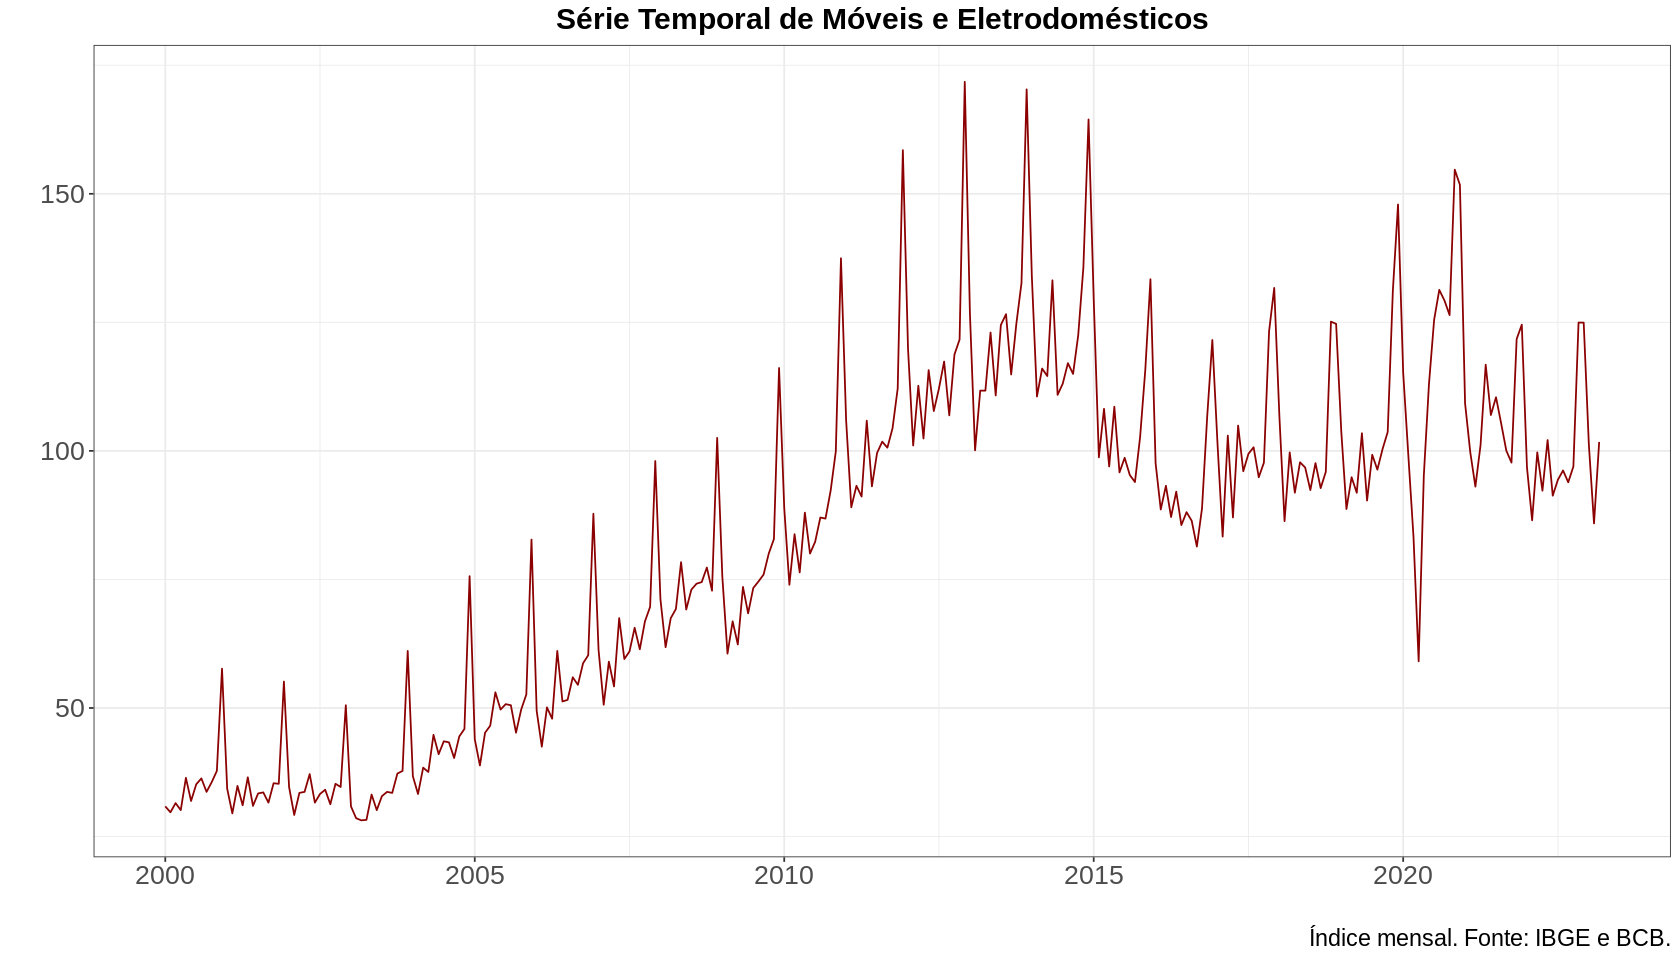

In [25]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 14, repr.plot.height = 8)

# Criar o objeto de plotagem usando ggplot
p <- ggplot(dat, aes(x = mes, y = moveis)) +
  geom_line(color = "darkred") +
  labs(x = "", y = "") +
  ggtitle("Série Temporal de Móveis e Eletrodomésticos") +
  theme_bw() +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),  # Tamanho dos números nos eixos x e y
        axis.title = element_text(size = 18),  # Tamanho dos títulos dos eixos x e y
        plot.caption = element_text(size = 14)) +  # Tamanho do texto em caption
  labs(caption = "Índice mensal. Fonte: IBGE e BCB.")

# Exibir o gráfico
print(p)

Faça um gráfico com a evolução mensal do Índice volume de vendas no varejo - Tecido, vestuário e calçado

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


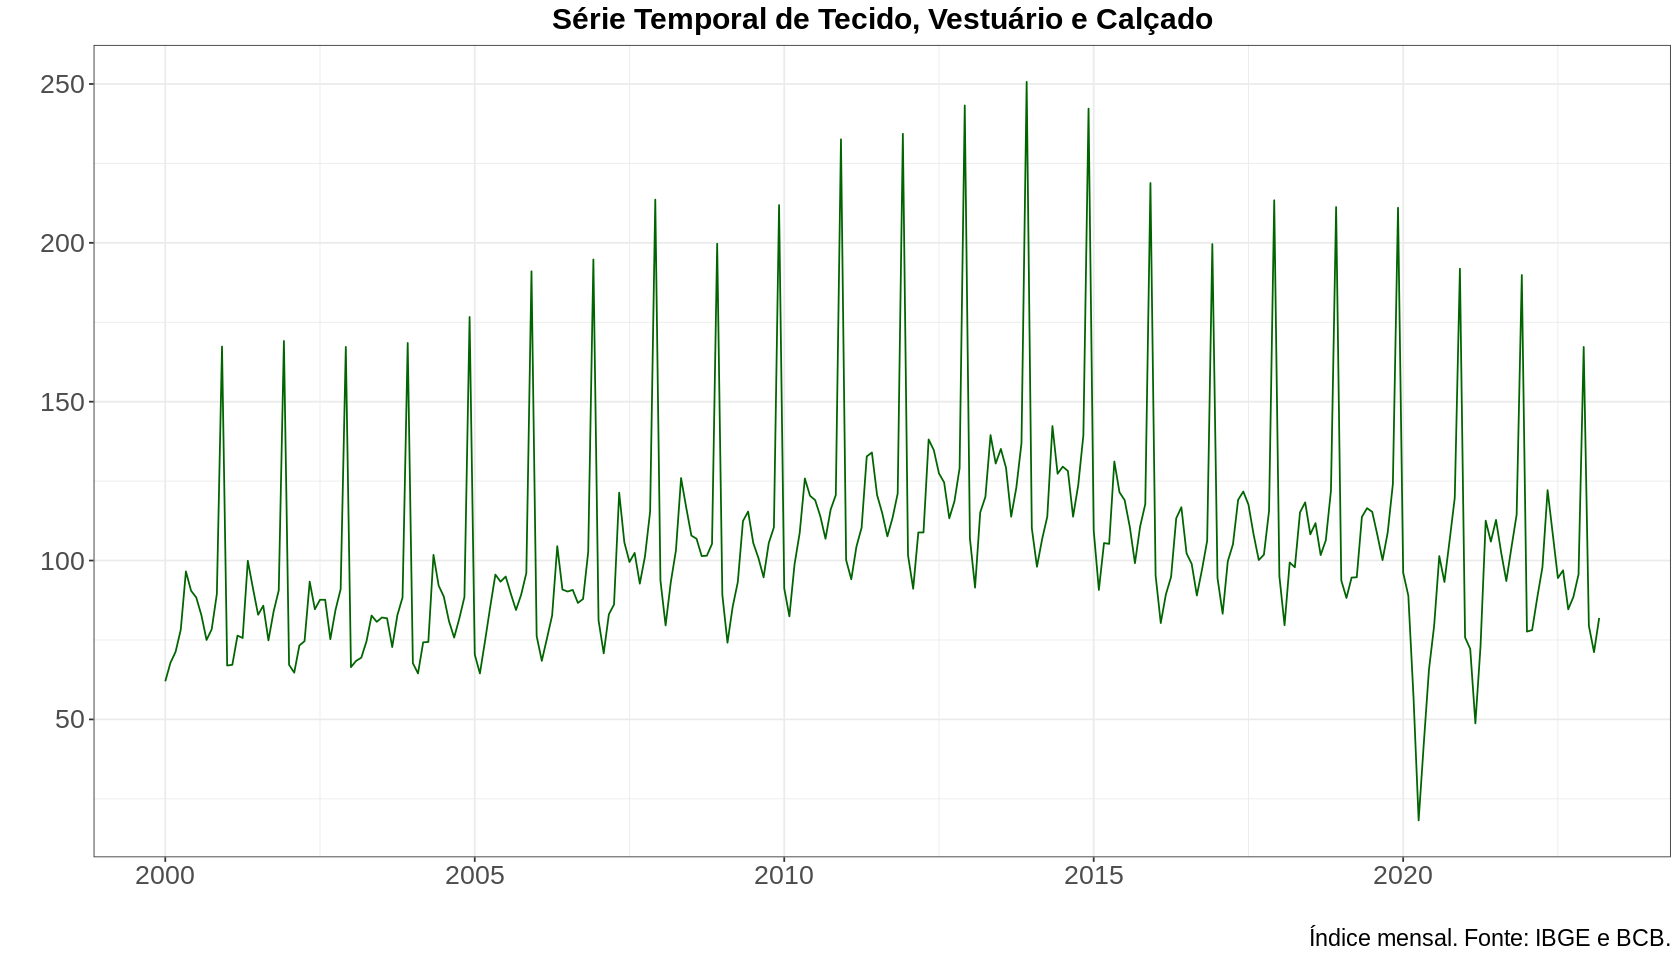

In [29]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 14, repr.plot.height = 8)

# Criar o objeto de plotagem usando ggplot
p <- ggplot(dat, aes(x = mes, y = calcado)) +
  geom_line(color = "darkgreen") +
  labs(x = "", y = "") +
  ggtitle("Série Temporal de Tecido, Vestuário e Calçado") +
  theme_bw() +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),  # Tamanho dos números nos eixos x e y
        axis.title = element_text(size = 18),  # Tamanho dos títulos dos eixos x e y
        plot.caption = element_text(size = 14)) +  # Tamanho do texto em caption
  labs(caption = "Índice mensal. Fonte: IBGE e BCB.")

# Exibir o gráfico
print(p)

## Sazonalidade

In [33]:
install.packages("forecast")  # para os gráficos de sazonalidade

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’




In [34]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Faça um gráfico para verificar os padrões sazonais mensais na série do Índice volume de vendas no varejo - Móveis e eletrodomésticos

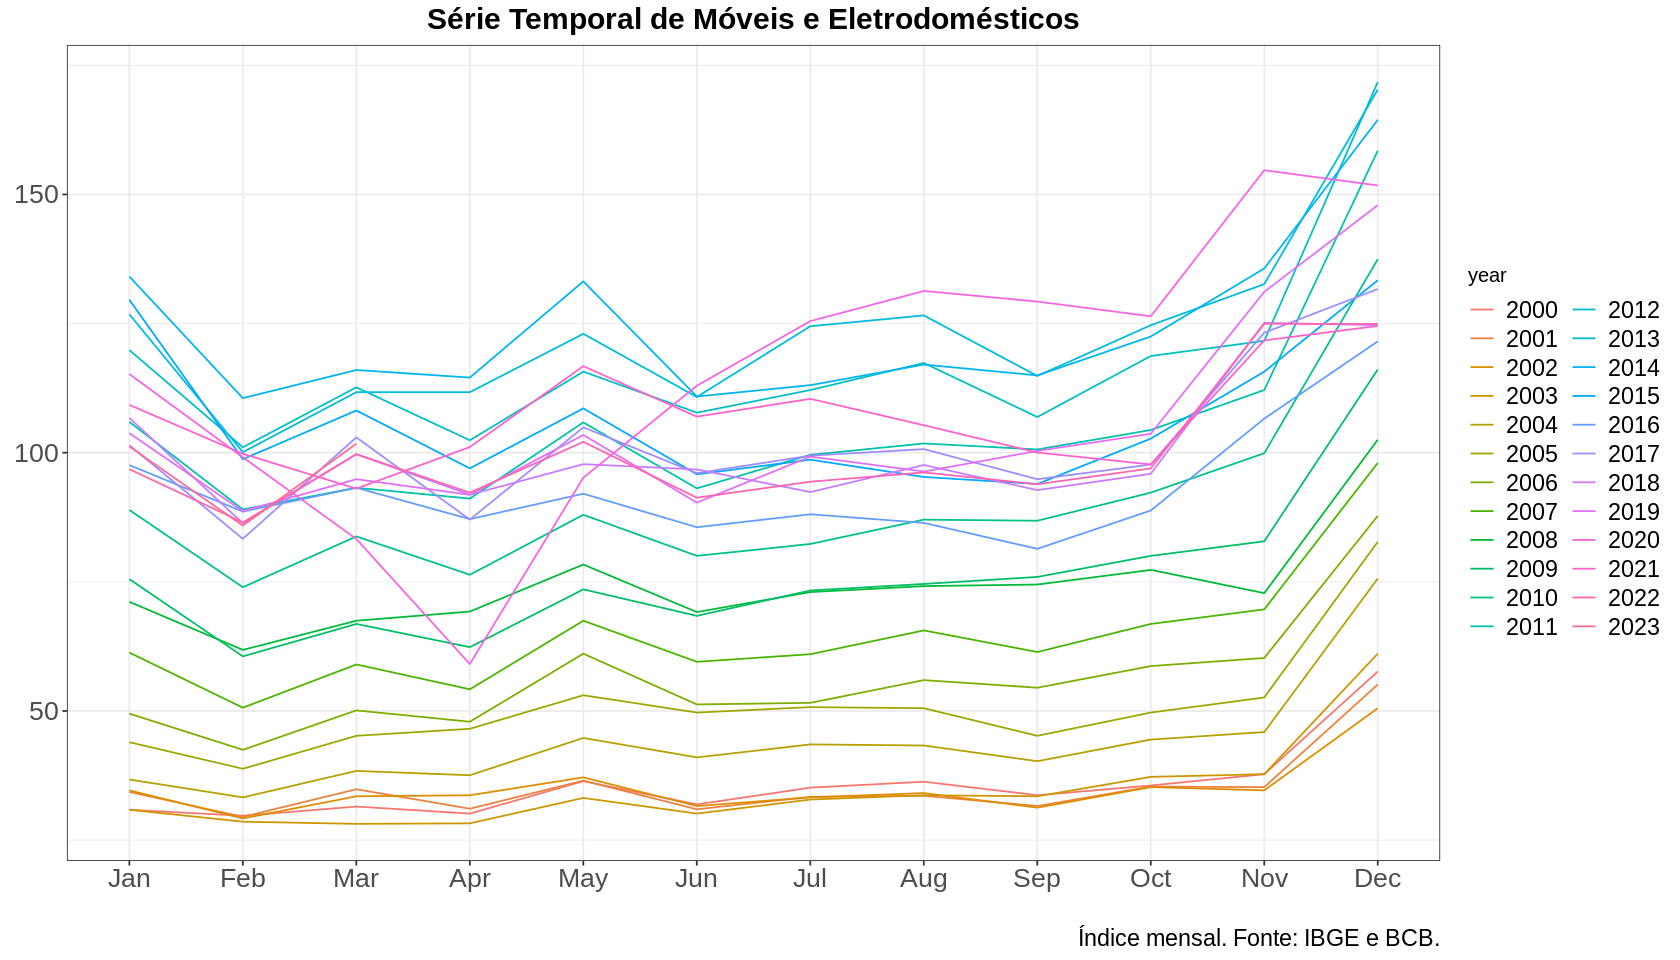

In [38]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 14, repr.plot.height = 8)

# Criar o objeto de plotagem usando ggplot
p <- ggseasonplot(dat$moveis) +
  theme_bw() +
  labs(x = "", y = "") +
  ggtitle("Série Temporal de Móveis e Eletrodomésticos") +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),  # Tamanho dos números nos eixos x e y
        axis.title.y = element_text(size = 16, angle = 360, vjust = 0.5, hjust = 1),  # Tamanho do título do eixo y
        axis.title.x = element_text(size = 16, vjust = 0.5, hjust = 1),  # Tamanho do título do eixo x
        text = element_text(size = 12),  # Tamanho do texto
        legend.text = element_text(size = 14),  # Tamanho do texto da legenda
        plot.caption = element_text(size = 14)) +  # Tamanho do texto em caption
  labs(caption = "Índice mensal. Fonte: IBGE e BCB.")

# Exibir o gráfico
print(p)

Faça um gráfico para verificar os padrões sazonais mensais na série do Índice volume de vendas no varejo - Tecido, vestuário e calçado

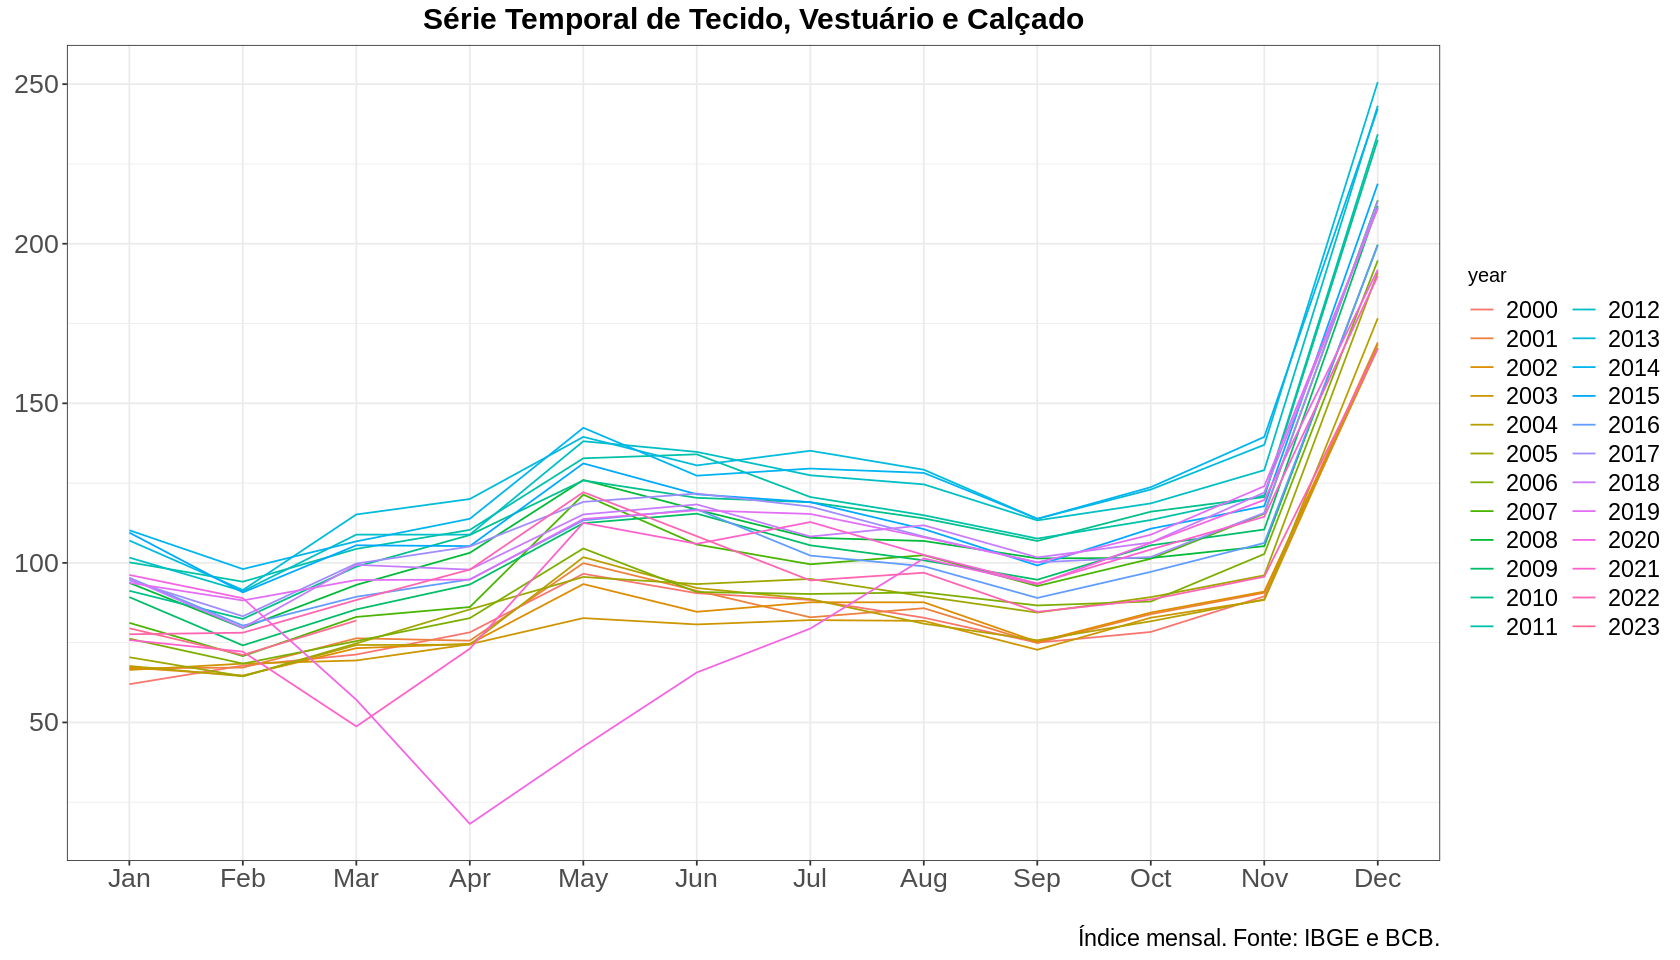

In [41]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 14, repr.plot.height = 8)

# Criar o objeto de plotagem usando ggplot
p <- ggseasonplot(dat$calcado) +
  theme_bw() +
  labs(x = "", y = "") +
  ggtitle("Série Temporal de Tecido, Vestuário e Calçado") +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),  # Tamanho dos números nos eixos x e y
        axis.title.y = element_text(size = 16, angle = 360, vjust = 0.5, hjust = 1),  # Tamanho do título do eixo y
        axis.title.x = element_text(size = 16, vjust = 0.5, hjust = 1),  # Tamanho do título do eixo x
        text = element_text(size = 12),  # Tamanho do texto
        legend.text = element_text(size = 14),  # Tamanho do texto da legenda
        plot.caption = element_text(size = 14)) +  # Tamanho do texto em caption
  labs(caption = "Índice mensal. Fonte: IBGE e BCB.")

# Exibir o gráfico
print(p)

## Funções de autocorrelação

Faça um gráfico com a função de autocorrelação do Índice volume de vendas no varejo - Móveis e eletrodomésticos

**Racional:**

 - Primeira barra é a autocorrelação entre Yt e Yt, por isso é 1
 - Segunda barra é a autocorrelação entre Yt e Yt-1
 - Terceira barra é a autocorrelação entre Yt e Yt-2 ...


 *Quanto mais devagar os valores demoram para decair, maior é a memória da série temporal*

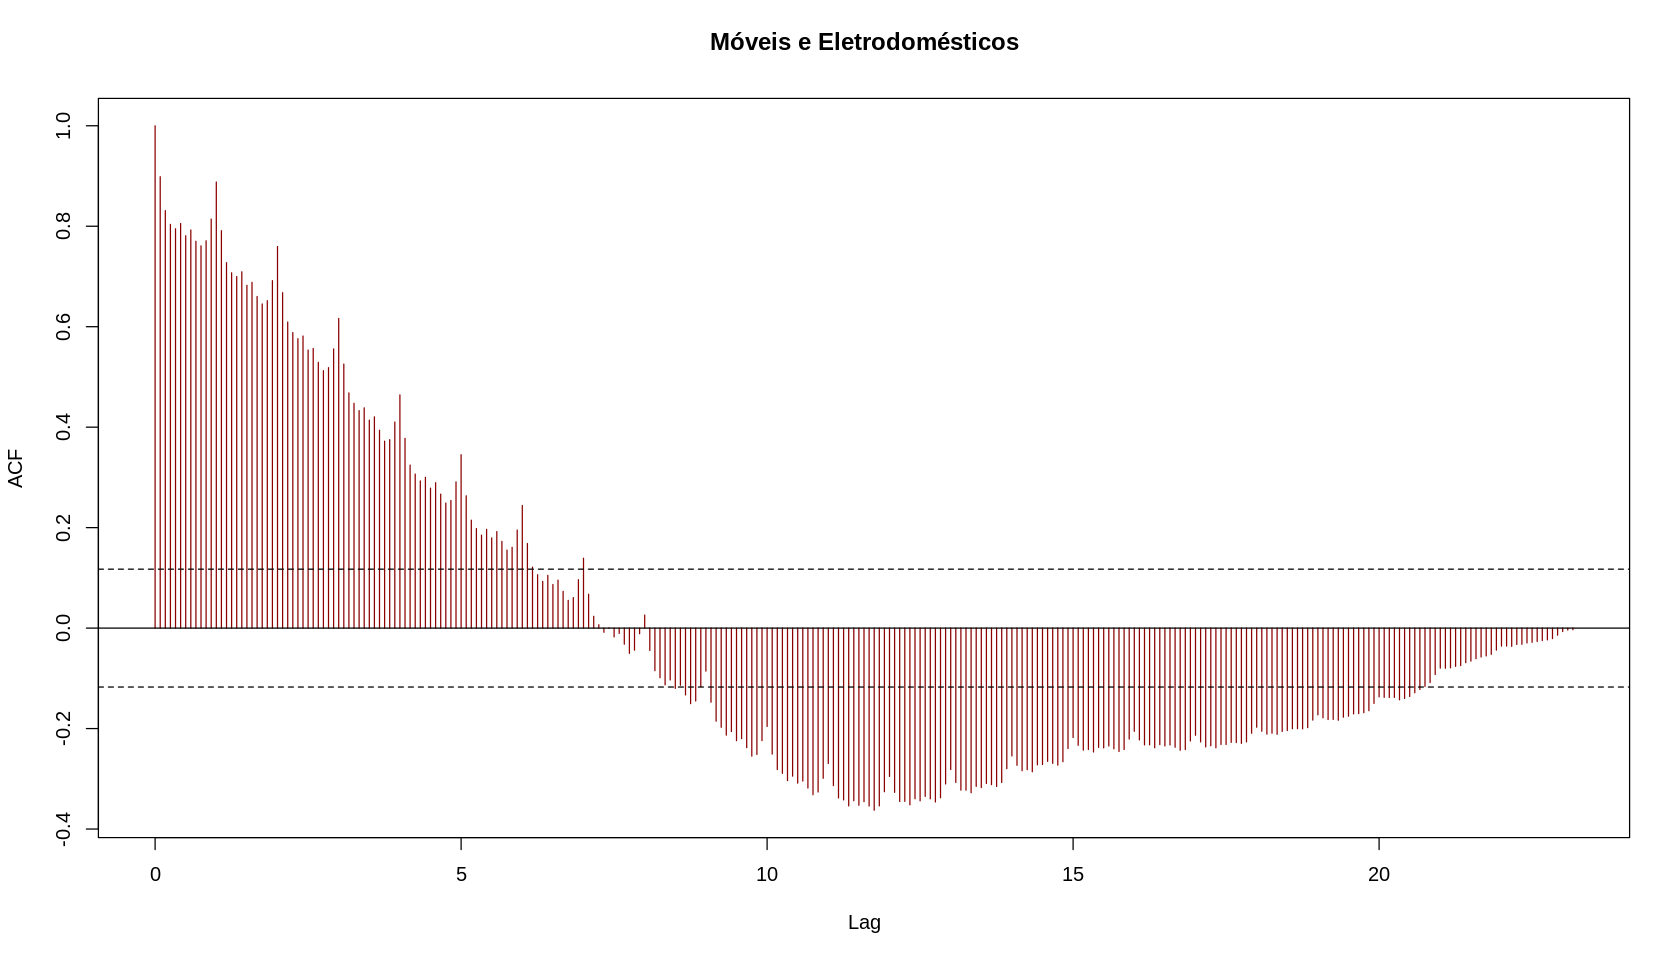

In [56]:
acf(dat$moveis, main = "Móveis e Eletrodomésticos", col = "darkred", ci.col = "black", lag.max = length(dat$moveis) - 1)

Faça um gráfico com a função de autocorrelação do Índice volume de vendas no varejo - Tecido, vestuário e calçado

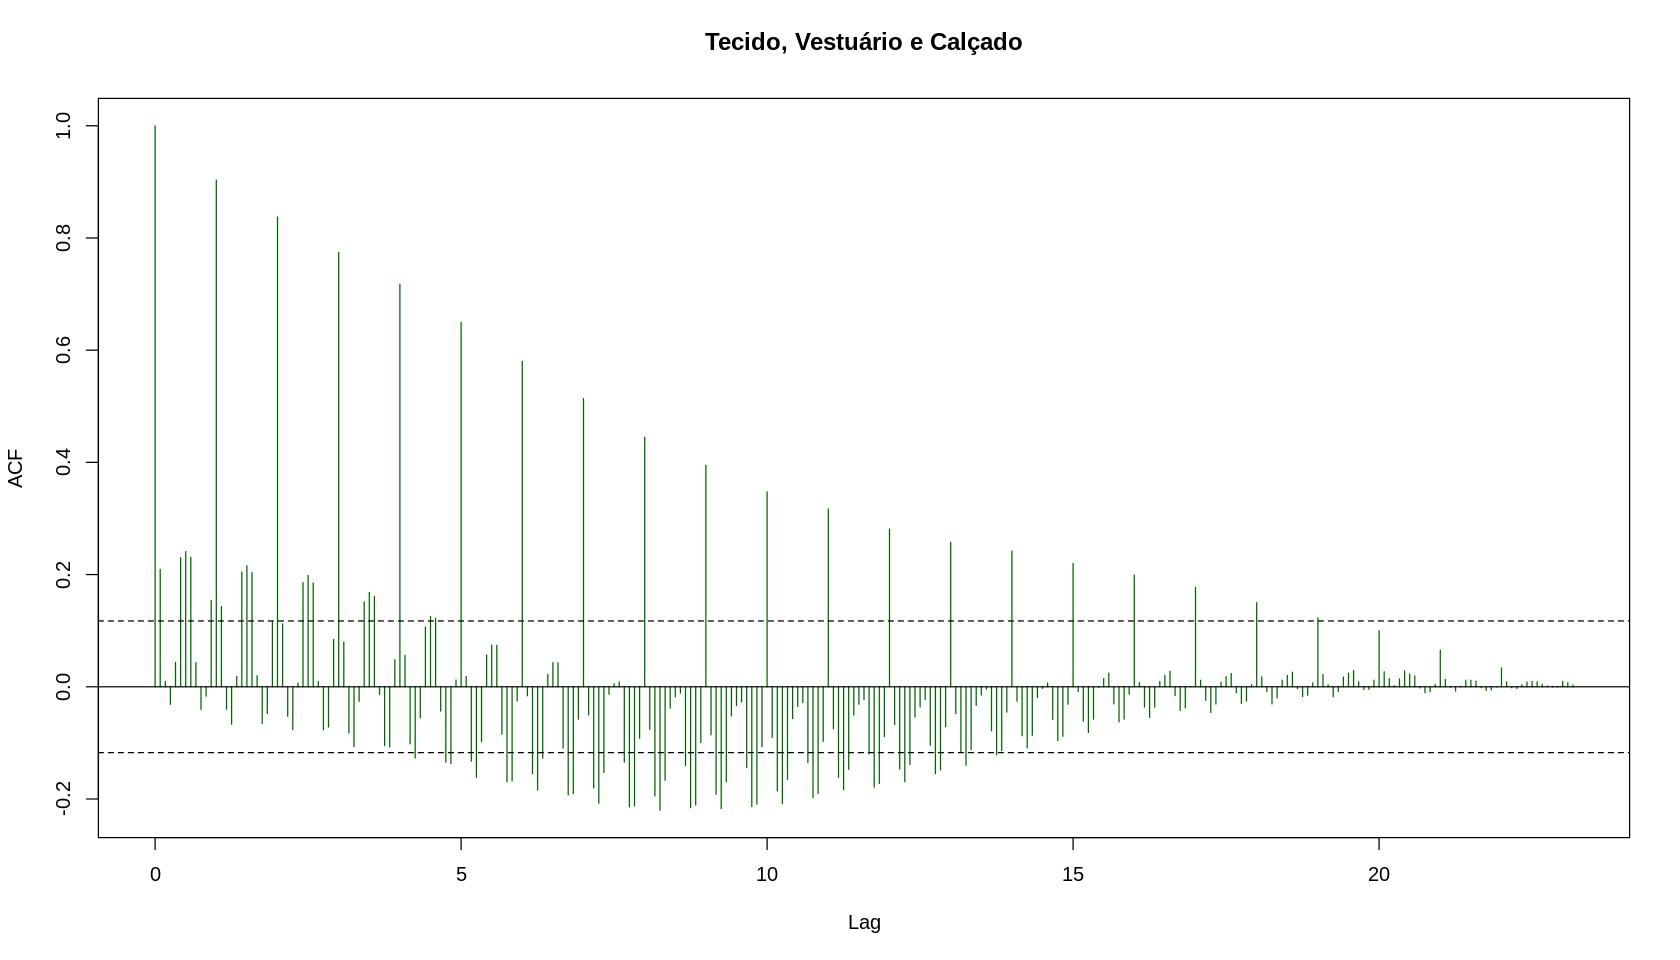

In [52]:
acf(dat$calcado, main = "Tecido, Vestuário e Calçado", col = "darkgreen", ci.col = "black", lag.max = length(dat$calcado) - 1)

Faça um gráfico com a função de autocorrelação parcial do Índice volume de vendas no varejo - Móveis e eletrodomésticos

**Racional:**

 - Primeira barra é quanto Yt-1 impacta Yt
 - Segunda barra é quanto Yt-2 impacta Yt
 - Terceira barra é quanto Yt-3 impacta Yt ...


 *Quanto maior a intensidade, maior é a representatividade daquele mês no valor de Yt*

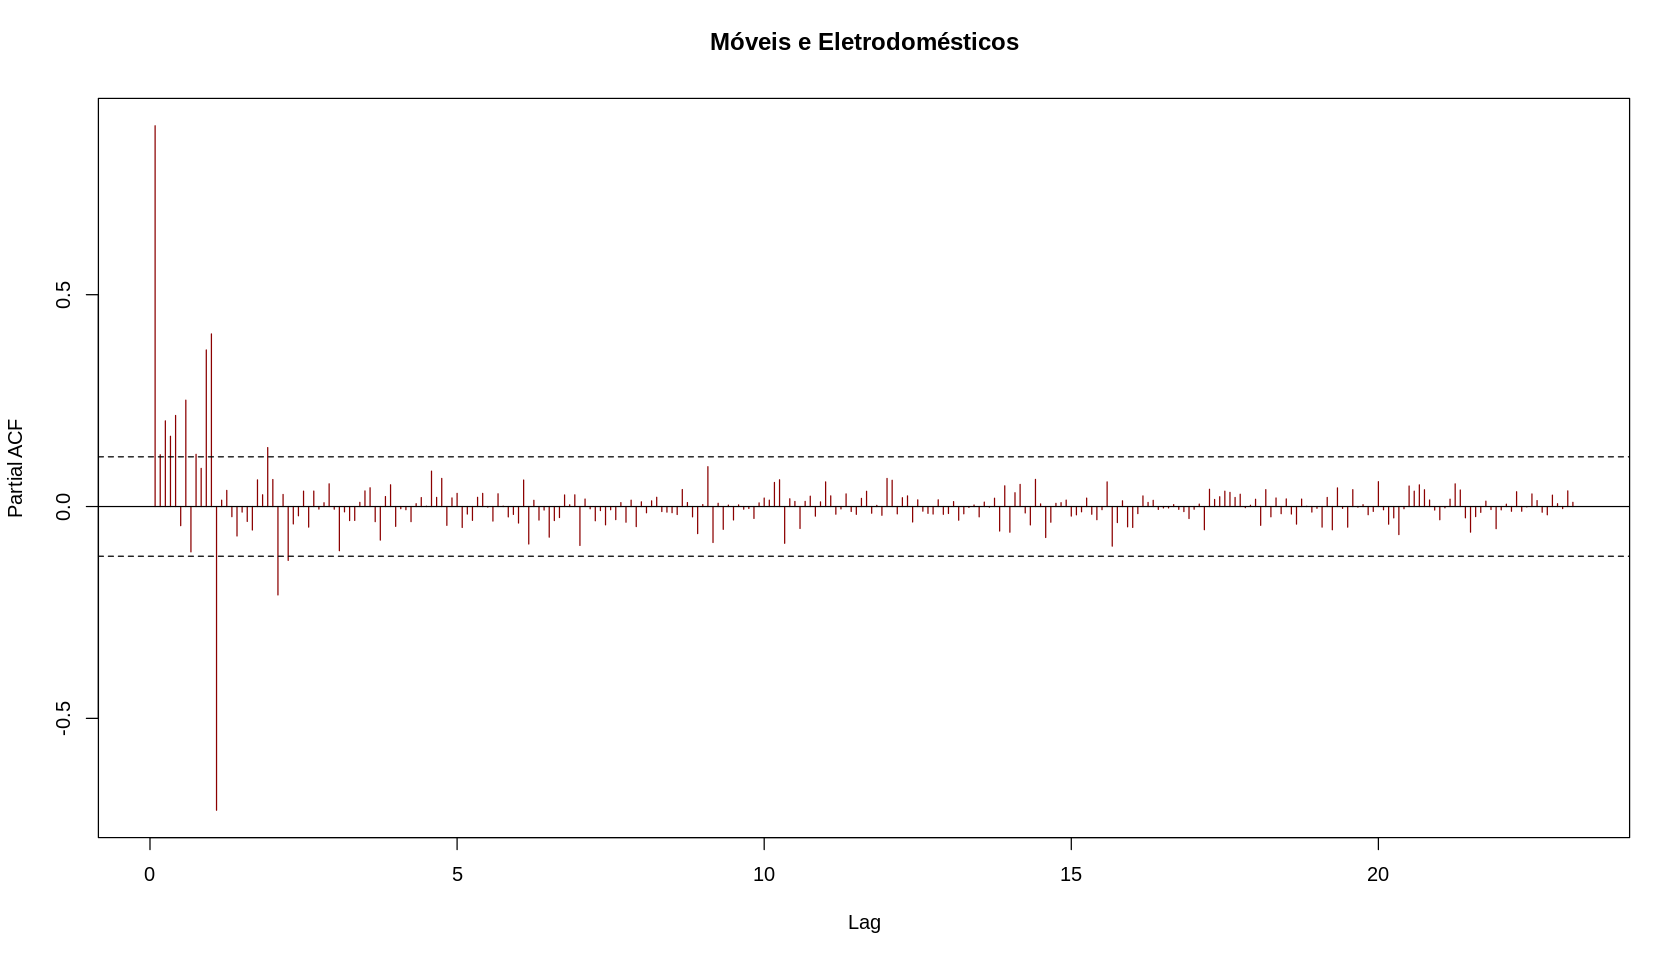

In [57]:
pacf( dat$moveis, main = "Móveis e Eletrodomésticos", col = "darkred", ci.col = "black", lag.max = length(dat$moveis) - 1)

Faça um gráfico com a função de autocorrelação parcial do Índice volume de vendas no varejo - Tecido, vestuário e calçado

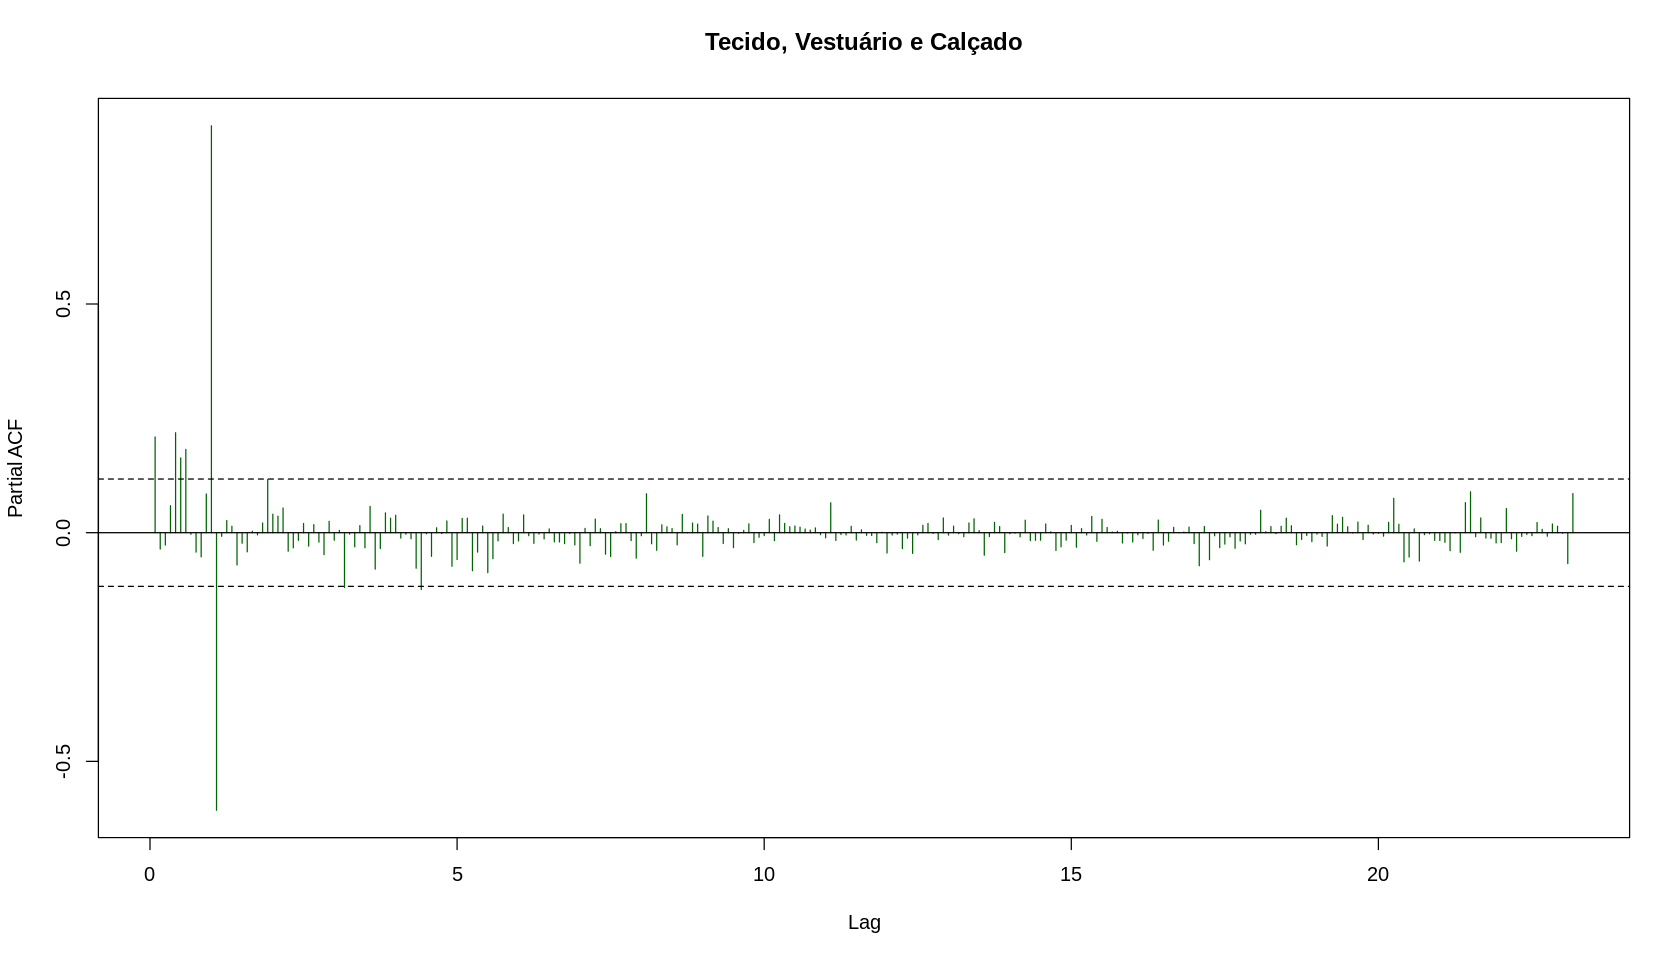

In [55]:
pacf( dat$calcado, main = "Tecido, Vestuário e Calçado", col = "darkgreen", ci.col = "black", lag.max = length(dat$calcado) - 1)

## Testes de raiz unitária

Faça um teste ADF de raiz unitária para a série do Índice volume de vendas no varejo - Móveis e eletrodomésticos.

In [44]:
install.packages("urca")           # para os testes de raiz unitária

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [45]:
library(urca)

### ADF (Augmented-Dickey-Fuller)

$H_0$: possui raiz unitária

In [46]:
summary( ur.df( dat$moveis, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.5864  -2.8127  -0.3951   2.5490  25.7389 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.27066    1.25309   1.812 0.071174 .  
z.lag.1      -0.02951    0.02662  -1.109 0.268540    
tt            0.00483    0.01068   0.452 0.651615    
z.diff.lag1  -0.17241    0.05247  -3.286 0.001162 ** 
z.diff.lag2  -0.20285    0.05232  -3.877 0.000135 ***
z.diff.lag3  -0.17979    0.05230  -3.437 0.000687 ***
z.diff.lag4  -0.20111    0.05242  -3.836 0.000158 ***
z.diff.lag5  -0.12986    0.05317  -2.442 0.015280 *  
z.diff.lag6  -0.16586    0.05270  -3.147 0.001848 ** 
z.diff.lag7  -0.13031    0.05190  -2.511 0.012681 *  
z.diff.lag8  -0.11767    0.05148  -2.286 0.023111 *  


Como interpretar?

* Primeiro (antes de fazer o teste!) temos que escolher o nível de significância (1%, 5% ou 10%).
* Depois, comparamos as estatísticas calculadas (value of test-statistics) com os valores críticos:
  * tau3: hipótese nula: raiz unitária.
  * phi2: hipótese nula: raiz unitária, sem tendência e sem drift.
  * phi3: hipótese nula: raiz unitária e sem tendência.

Resultado:

Como, em módulo, os valores de test-statistic são menores que tau3, phi2 e phi3, não se rejeita nenhuma das hipóteses nulas, independente do nível de significância

Faça um teste ADF de raiz unitária para a série do Índice volume de vendas no varejo - Tecido, vestuário e calçado.

Agora, faça um teste KPSS de raiz unitária para a série do Índice volume de vendas no varejo - Móveis e eletrodomésticos.

In [60]:
summary( ur.df( dat$calcado, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.745  -3.922  -0.059   4.444  53.853 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.974267   4.008232   1.740 0.083087 .  
z.lag.1      -0.063251   0.040938  -1.545 0.123600    
tt           -0.000862   0.007985  -0.108 0.914123    
z.diff.lag1  -0.199389   0.058781  -3.392 0.000806 ***
z.diff.lag2  -0.214365   0.056993  -3.761 0.000210 ***
z.diff.lag3  -0.219088   0.055925  -3.918 0.000115 ***
z.diff.lag4  -0.219123   0.055255  -3.966 9.55e-05 ***
z.diff.lag5  -0.198925   0.054693  -3.637 0.000335 ***
z.diff.lag6  -0.188171   0.053615  -3.510 0.000532 ***
z.diff.lag7  -0.179750   0.052212  -3.443 0.000675 ***
z.diff.lag8  -0.168579   0.050476  -3.340 0.000966 **

### KPSS

$H_0$: não possui raiz unitária

In [47]:
summary( ur.kpss( dat$moveis, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 5 lags. 

Value of test-statistic is: 0.7734 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


Resultado:

Como, em módulo, o valor de test-statistic é maior que o valor crítico, rejeita-se a hipótese nula, independente do nível de significância, ou seja, a série possui raiz unitária, ou seja, é não-estacionária


Faça um teste KPSS de raiz unitária para a série do Índice volume de vendas no varejo - Tecido, vestuário e calçado.

In [59]:
summary( ur.kpss( dat$calcado, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 5 lags. 

Value of test-statistic is: 0.7104 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


## Induzir estacionariedade

Utilize a função 'diff()' para calcular a primeira diferença das séries de móveis e de calçados:

Crie um data frame com as duas variáveis novas e com uma variável de datas com a função 'time()':

Faça um gráfico com a evolução mensal da **primeira diferença** do Índice volume de vendas no varejo - Móveis e eletrodomésticos

Faça um gráfico com a evolução mensal da **primeira diferença** do Índice volume de vendas no varejo - Tecido, vestuário e calçado

Faça um gráfico para verificar os padrões sazonais mensais na série da **primeira diferença** do Índice volume de vendas no varejo - Móveis e eletrodomésticos

Faça um gráfico para verificar os padrões sazonais mensais na série da **primeira diferença**  do Índice volume de vendas no varejo - Tecido, vestuário e calçado

**[Desafio -- Para casa]**

E se quiséssemos verificar o gráfico não em diferença absoluta, mas em taxa de crescimento percentual frente ao mês anterior, como ficaria?

Faça um gráfico com a função de autocorrelação da **primeira diferença** do Índice volume de vendas no varejo - Móveis e eletrodomésticos

Faça um gráfico com a função de autocorrelaçãoda **primeira diferença** do Índice volume de vendas no varejo - Tecido, vestuário e calçado

Faça um gráfico com a função de autocorrelação parcial da **primeira diferença** do Índice volume de vendas no varejo - Móveis e eletrodomésticos

Faça um gráfico com a função de autocorrelação parcial da **primeira diferença** do Índice volume de vendas no varejo - Tecido, vestuário e calçado

Faça um teste ADF de raiz unitária para a série da **primeira diferença** do Índice volume de vendas no varejo - Móveis e eletrodomésticos.

Faça um teste ADF de raiz unitária para a série da **primeira diferença** do Índice volume de vendas no varejo - Tecido, vestuário e calçado.

Agora, faça um teste KPSS de raiz unitária para a série da **primeira diferença** do Índice volume de vendas no varejo - Móveis e eletrodomésticos.

Faça um teste KPSS de raiz unitária para a série da **primeira diferença** do Índice volume de vendas no varejo - Tecido, vestuário e calçado.